In [1]:
import PIL
from datetime import datetime
from PIL import Image
import numpy as np
from sklearn.preprocessing import scale

import FlatPreProcessing

from scipy.misc import imread
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.ensemble import AdaBoostClassifier
start1 = datetime.now()
BASE_DIR = Path('.')
(train_data, label_data) = FlatPreProcessing.main()

label_data = label_data.ravel()
print("Train Shape:", train_data.shape)

Image Size: 40
Processed: 0 of 734


Processed: 100 of 734


Processed: 200 of 734


Processed: 300 of 734


Processed: 400 of 734


Processed: 500 of 734


Processed: 600 of 734


Processed: 700 of 734


Processed: 0 of 734


Processed: 100 of 734


Processed: 200 of 734


Processed: 300 of 734


Processed: 400 of 734


Processed: 500 of 734


Processed: 600 of 734


Processed: 700 of 734
Training Data: (1174400, 52)
Label Data: (1174400,)
Train Shape: (1174400, 52)


In [2]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20)
print("Fitting Random Forest...")
start = datetime.now()
rf.fit(train_data, label_data)
print("Completed fit.")
finish = datetime.now()
print("Time: {}".format(finish-start))

Fitting Random Forest...


Completed fit.
Time: 0:05:19.892127


In [27]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=20)
print("Fitting Adaboost...")
start1 = datetime.now()
# randIndexes = np.random.choice(len(label_data), len(label_data) // 10000)
# print("Number of Sample: {}".format(len(randIndexes)))
# td = [train_data[x] for x in randIndexes]
# ld = [label_data[x] for x in randIndexes]
td = train_data
ld = label_data
clf.fit(td, ld)
print("Completed fit.")
finish1 = datetime.now()
print("Time: {}".format(finish1-start1))

Fitting Adaboost...
Completed fit.
Time: 0:00:00.000501


In [4]:
# Import the data matrix of the testing data
# Skip if cross validating!

from LoadTestImages import main
test_data = main()

Processed: 0 of 44


Processed: 0 of 44


In [15]:
# Standard Prediction Block. Adjust accordingly!

print("Predicting Data..")
predictions = rf.predict(train_data)
print("finished Predicting!")
predictions = np.asarray(predictions).ravel()
print(predictions.size)

Predicting Data..


finished Predicting!
525600


In [3]:
# Cross Validation Block. Should be used in adjusting algorithm
from sklearn.model_selection import cross_val_score
print("Cross Validating...")
start1 = datetime.now()
scores = cross_val_score(rf, train_data, label_data, cv=3, scoring='f1')
print("Scores: {}".format(scores))
finish1 = datetime.now()
print("Time: {}".format(finish1-start1))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross Validating...


KeyboardInterrupt: 

In [16]:
# K Neighbors
import LoadTestImages
from PIL import ImageFilter
prediction_list = np.asarray(predictions)
s_n = LoadTestImages.SIZE
num_im = 146
print(s_n)
print(prediction_list.shape)
image_list = prediction_list.reshape(num_im, s_n, s_n)
filt_image_list = np.ndarray((num_im, s_n, s_n))
for i in range(num_im):
    im = Image.fromarray(image_list[i])
    im_mode = im.filter(ImageFilter.ModeFilter(3))
    filt_image_list[i] = im_mode
# test_coords = test_data[:, 3:]
# print(test_coords.shape)
# 
# print("KNN Beginning")
# neigh = KNeighborsClassifier(n_neighbors=15)
# neigh.fit(test_coords, predictions.ravel())
# 
# 
# kpredictions = neigh.predict(test_coords)
# 
# print("Pred Shape", predictions.shape)
# 
# predictions = neigh.predict(test_data.ravel())
print("Mode Filtered.")

60
(525600,)
Mode Filtered.


In [17]:
# Calculate Dice Similarity Coefficient
dice_p = filt_image_list.ravel()
# dice_p = prediction_list.ravel()
truepos = np.sum(np.multiply(dice_p, label_data))
print("True Positives... {}".format(truepos))
falsepos = np.sum(dice_p) - truepos
print("False Positives... {}".format(falsepos))

falseneg = np.sum(label_data) - truepos
print("False Negatives... {}".format(falseneg))
precision = truepos / (truepos+falsepos)
print("Precision... {}".format(precision))
recall = truepos / (truepos+falseneg)
print("Recall... {}".format(recall))
dice = 2 * precision * recall / (precision + recall)

print("Dice Coefficient: {}".format(dice))

True Positives... 190688.0
False Positives... 10653.0
False Negatives... 18356.0
Precision... 0.9470897631381586
Recall... 0.9121907349648878
Dice Coefficient: 0.9293127185447811


In [18]:
import LoadTestImages
pred_image = np.asarray(predictions)
print(pred_image.shape)
t_n = LoadTestImages.SIZE
pred_image = pred_image.reshape(num_im, t_n, t_n)
pred_image.shape

(525600,)


(146, 60, 60)

(525600,)


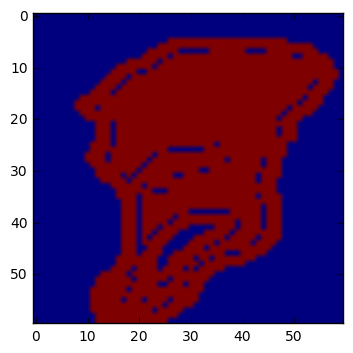

In [25]:
from scipy.misc import imread
import matplotlib.pyplot as plt
lb = np.asarray(label_data)
print(lb.shape)
lb = lb.reshape(146, t_n, t_n)
plt.imshow(lb[3])
plt.show()

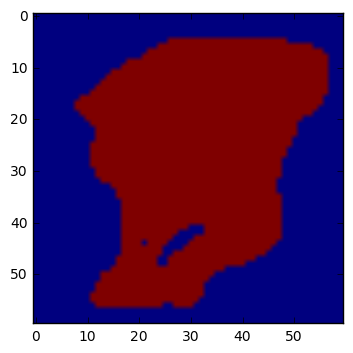

In [23]:
im = filt_image_list[3]
im = Image.fromarray(im).convert('L')
# im = Image.open('labelled/31.png')
im1 = im.load()
plt.imshow(im)
plt.show()

(384, 512)
1


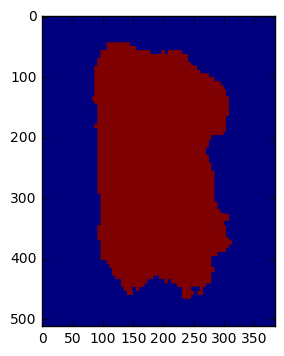

In [18]:
im = Image.open('../CatDogDataSet/labelled_1345/06.png')
print(im.size)
im1 = im.load()
print(im1[200,150])
plt.imshow(im)
plt.show()

(384, 512)
1


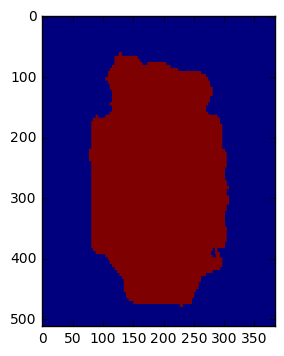

In [19]:
im = Image.open('labelled/06.png')
print(im.size)
im1 = im.load()
print(im1[200,150])
plt.imshow(im)
plt.show()

In [7]:
import os
from pathlib import Path
TRI_DIR = Path('../CatDogDataSet/test_images')
BASE_DIR = Path('.')
base_out = Path(BASE_DIR, 'labelled')
test_dir_out = Path(base_out, 'train')
os.makedirs(str(test_dir_out), exist_ok=True)

test_path = [x for x in TRI_DIR.iterdir() if TRI_DIR.is_dir() and '.jpg' in str(x).lower()]
test_sizes = []
for p in test_path:
    img = Image.open(p)
    test_sizes.append(img.size)
    
# print(test_sizes)
test_names = [os.path.basename(str(x)).split('.')[0] for x in test_path]
test_names = ['0{}'.format(x) if (len(x)==1) else x for x in test_names]
# print(test_names)
count = len(test_names)
for i in range(count):
    (n_x, n_y) = test_sizes[i]
    im = filt_image_list[i]
    im = Image.fromarray(im).convert('L')
    im = im.resize((n_x,n_y), resample=Image.ANTIALIAS)
    basename = '{}.png'.format(test_names[i])
    # print(basename)
    path_out = os.path.join(str(base_out), basename)
    # print("Path out:", str(path_out))
    im.save(path_out)
# test_mat = np.ndarray(count, 32, 32)

print("Saved Files")

Saved Files
